Project: Unsupervised Brain Tumor Detection Using K-Means Clustering on MRI Images
**Brain Tumor Detection Dataset Overview**

This dataset contains brain MRI images that are categorized into four types, representing different brain conditions. The images come from three sources: figshare, SARTAJ, and Br35H. Specifically, the no tumor images are mainly from the Br35H dataset. For the glioma class, the images from the SARTAJ dataset were found to be problematic, so they were replaced with more reliable ones from figshare.

The goal of this project is to apply unsupervised learning to uncover patterns in brain MRI images and potentially detect anomalies. Using K-Means Clustering, we can group similar images together without relying on pre-existing labels. This approach can help in identifying abnormalities and gaining insights into different types of brain tumors.

**Dataset Structure**

The dataset is organized into two folders:

Training: Contains MRI images for model training.
Testing: Contains MRI images for evaluating the clustering results.
Each of these folders has four subfolders representing different categories:

Glioma: Tumors originating from glial cells in the brain.
Meningioma: Tumors forming in the meninges, the layers surrounding the brain and spinal cord.
No Tumor: Normal brain scans with no evidence of tumors.
Pituitary: Tumors located in the pituitary gland, a small gland at the base of the brain.
Since the images vary in size, they will be resized and normalized during preprocessing to ensure consistent input for the model.

**Project Objectives**

This project aims to:

Cluster Brain MRI Images: Apply K-Means Clustering to group images based on their visual similarities.
Identify Anomalies: Detect outliers and potential anomalies by analyzing how the images are grouped.
Visualize Results: Use techniques like Principal Component Analysis (PCA) or t-SNE to visualize the clusters in a simplified form.
Evaluate Performance: Assess the quality of the clustering using metrics like the Silhouette Score and Inertia.






In [82]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [84]:
# Set Paths
train_path = "/Users/sultan/Documents/project/Brain_Tumor/archive/Training"
test_path = "/Users/sultan/Documents/project/Brain_Tumor/archive/Testing"

In [86]:
IMG_SIZE = (128, 128)
NUM_CLUSTERS = 4

In [88]:
def load_images(data_path):
    images = []
    labels = []
    class_names = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
    class_map = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_folder = os.path.join(data_path, class_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue  # Skip non-image files
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE)
            images.append(img.flatten())  # Flatten to 1D
            labels.append(class_map[class_name])

    return np.array(images), np.array(labels), class_map


In [90]:
# Load Train and Test Data
print("Loading training data...")
X_train, y_train, class_map = load_images(train_path)

print("Loading testing data...")
X_test, y_test, _ = load_images(test_path)

Loading training data...
Loading testing data...


Visualizing sample images from Training Set:


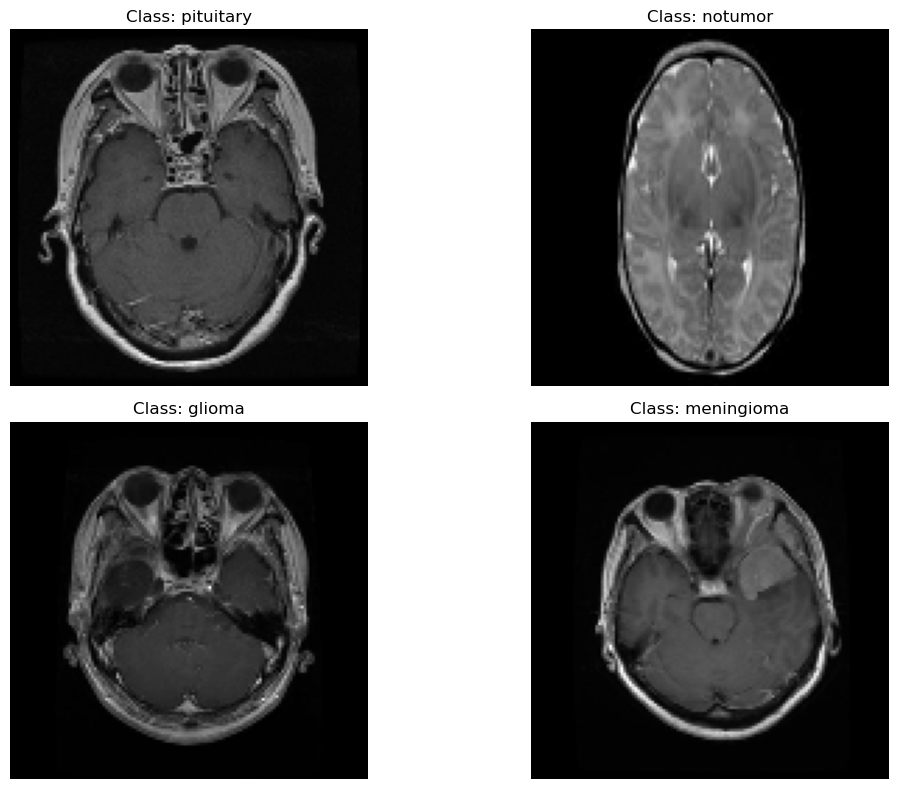

In [92]:
def plot_sample_images(data_path):
    class_names = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
    plt.figure(figsize=(12, 8))
    
    for i, class_name in enumerate(class_names):
        class_folder = os.path.join(data_path, class_name)
        img_path = os.path.join(class_folder, np.random.choice(os.listdir(class_folder)))
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img, IMG_SIZE)
        
        plt.subplot(2, 2, i + 1)
        plt.imshow(img_resized, cmap='gray')
        plt.title(f"Class: {class_name}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Visualizing sample images from Training Set:")
plot_sample_images(train_path)


In [94]:

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [96]:
pca = PCA(n_components=50)  # Reduce to 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [98]:
# Train K-Means Model
print("Training K-Means model...")
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
kmeans.fit(X_train_pca)

Training K-Means model...


KMeans(n_clusters=4, n_init=10, random_state=42)

In [100]:
print("Predicting clusters for test data...")
train_clusters = kmeans.predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

Predicting clusters for test data...


Visualizing Clusters from Training Set:


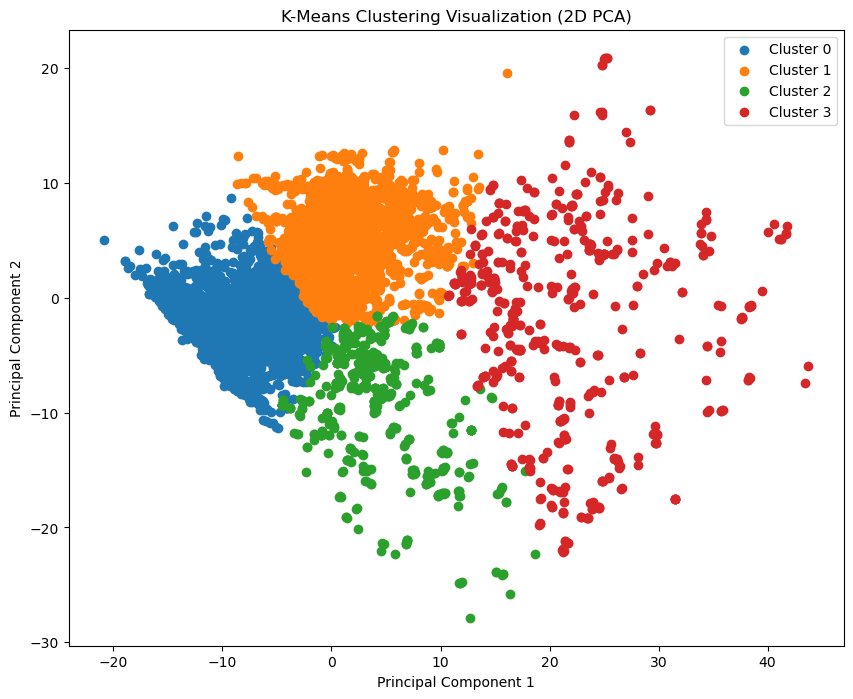

In [102]:
def plot_clusters(data, clusters, num_clusters=4):
    pca_2d = PCA(n_components=2)
    data_2d = pca_2d.fit_transform(data)

    plt.figure(figsize=(10, 8))
    for i in range(num_clusters):
        plt.scatter(data_2d[clusters == i, 0], data_2d[clusters == i, 1], label=f'Cluster {i}')
    
    plt.legend()
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("K-Means Clustering Visualization (2D PCA)")
    plt.show()

print("Visualizing Clusters from Training Set:")
plot_clusters(X_train_pca, train_clusters)


In [104]:
# Display Cluster Results
print("Cluster Results:")
for i in range(NUM_CLUSTERS):
    print(f"Cluster {i}: {list(class_map.keys())[i]}")

Cluster Results:
Cluster 0: pituitary
Cluster 1: notumor
Cluster 2: glioma
Cluster 3: meningioma


Visualizing Cluster Results from Training Data:


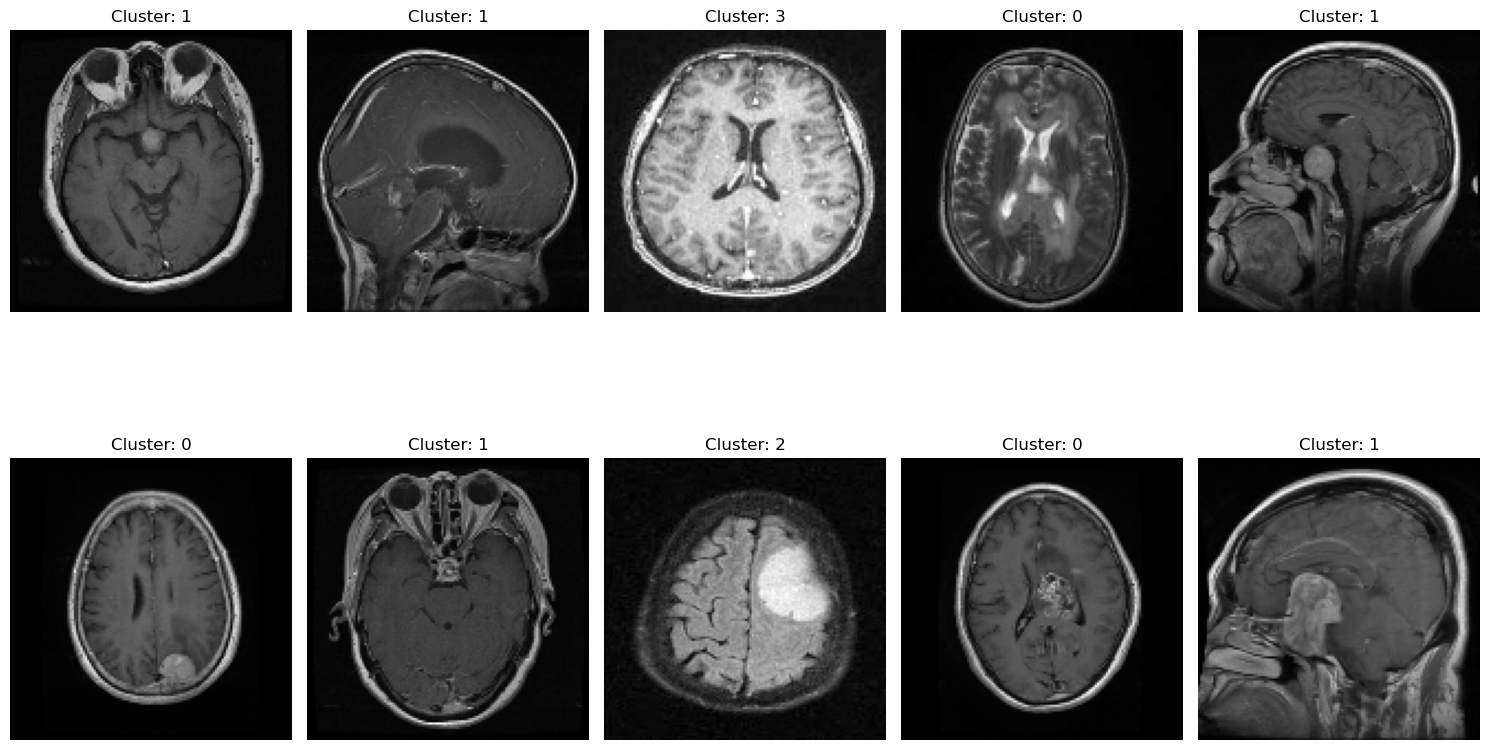

In [106]:
def visualize_cluster_results(data, clusters, class_map, num_images=10):
    plt.figure(figsize=(15, 10))
    selected_indices = np.random.choice(len(data), num_images, replace=False)

    for i, idx in enumerate(selected_indices):
        img = data[idx].reshape(IMG_SIZE)
        cluster_label = clusters[idx]
        
        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Cluster: {cluster_label}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

print("Visualizing Cluster Results from Training Data:")
visualize_cluster_results(X_train, train_clusters, class_map)


In [108]:
# Evaluate using Silhouette Score
train_score = silhouette_score(X_train_pca, train_clusters)
test_score = silhouette_score(X_test_pca, test_clusters)
print(f"Silhouette Score (Train): {train_score:.4f}")
print(f"Silhouette Score (Test): {test_score:.4f}")

Silhouette Score (Train): 0.1659
Silhouette Score (Test): 0.1488


The Silhouette Score for the train set is 0.1659 and for the test set is 0.1488.
A low Silhouette Score typically means that the data points are too close to the boundaries of other clusters, indicating overlapping or poorly defined clusters. Factors like variations in tumor size, shape, and imaging quality may contribute to the lower cluster distinctivenes